In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series
from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

dfTB = pd.read_csv("/Users/kenmckee/Desktop/GS/SP182/AA/Lab2.csv")
#series = Series.from_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/Zip_Zhvi_SingleFamilyResidence")
#print(dfTB.describe())
#list(series.columns.values)
#print(dfTB.head())


datetr = pd.date_range(start='1/1/1997', periods=204, freq='M')

datete = pd.date_range(start='1/1/1997', periods=216, freq='M')

dfTB.shape

#print(dates)
#print(dates.shape)

#print(gbState.City.unique())


(14602, 272)

In [56]:
#get the arkansas data 
ARdata = dfTB.loc[dfTB['State'] == "FL"]

#Brev = dfTB.loc[dfTB['CountyName'] == "Brevard"]

#ARdata = FLdata.drop(['Unnamed: 0'], axis=1)

#set it up for graph
A1a  = ARdata.loc[ARdata['RegionName'] == 32935]




#print(A1a.describe())
A1b = A1a.groupby(['RegionName'])
A1c = A1b.mean()
A1d = A1c.loc['1997-01':'2014-03']
A1e = A1c.T
A1eTS = A1e.drop(A1e.index[[0,1,2,3]]).reset_index()
AleTSx = pd.DataFrame(A1eTS)
AleTSte = AleTSx.iloc[9:225]
AleTStr = AleTSx.iloc[9:213]

 

A1a.shape






(1, 272)

In [58]:
tr = pd.Series(datetr)
te = pd.Series(datete)
#ty = pd.Series(AleTSy).reset_index()
t1te = AleTSte[32935].reset_index()
t1tr  = AleTStr[32935].reset_index()
t2te = t1te[32935]
t2tr = t1tr[32935]
#print(t2)

te = pd.concat([te, t2te], axis=1)
tr = pd.concat([tr, t2tr], axis=1)
te.columns = ['date','avgHomePrice']
tr.columns = ['date','avgHomePrice']
tr.index = tr['date']
te.index = te['date']
del tr['date']
del te['date']
#print(tz)

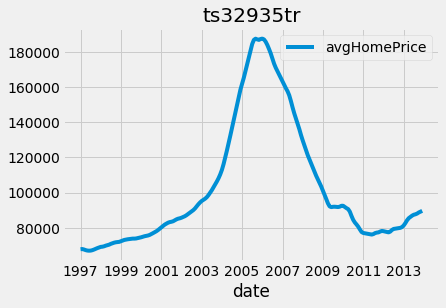

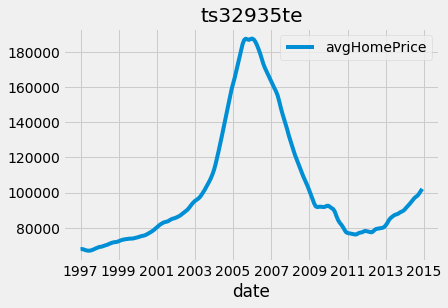

(216, 1)

In [59]:


#change this after you get your data 
#there should be a function built here but i dont know how to do that yet. 

#LRts = tz Little Rock/ City
#HSts = tz Hot Springs
#FVts = tz Feyetteville
#SEts =tz  swhatever

#ORts = tz orlando
#TAts = tz tampa
#KWts = tz  Key West
#BRts = tz  Brevard
#BRCts = tz  Brevard x cities

#BRCf = tz

#ts32935 = tz # MelbourneN
#ts32931 = tz  #Cocoa Beach
#ts32951 = tz  #Melbourne Beach
ts32935te = te  #Titusville
ts32935tr = tr  #Titusville
#ts32789 = tz  #Winter Park


#Write to a CSV if you need to. 
#BRCts.to_csv('BRCts.csv',sep=",")

#print(ts32780)
#ts32780.to_csv('ts32780.csv')
#ts32931.to_csv('ts32931.csv')
#ts32951.to_csv('ts32951.csv')
ts32935te.to_csv('ts32780te.csv')
ts32935tr.to_csv('ts32780tr.csv')
#graph it
len(A1e)
ts32935tr.plot()
plt.title('ts32935tr')
 
len(A1e)
ts32935te.plot()
plt.title('ts32935te')
plt.show()

ts32789te.shape

In [60]:
print(ts32789tr)
print(ts32789te)

            avgHomePrice
date                    
1997-01-31      162365.0
1997-02-28      163995.0
1997-03-31      164873.0
1997-04-30      164794.0
1997-05-31      163802.0
1997-06-30      162545.0
1997-07-31      161267.0
1997-08-31      159960.0
1997-09-30      158919.0
1997-10-31      158676.0
1997-11-30      159540.0
1997-12-31      160902.0
1998-01-31      161980.0
1998-02-28      162595.0
1998-03-31      162967.0
1998-04-30      162940.0
1998-05-31      162965.0
1998-06-30      163943.0
1998-07-31      165970.0
1998-08-31      168313.0
1998-09-30      170658.0
1998-10-31      172815.0
1998-11-30      174548.0
1998-12-31      175847.0
1999-01-31      177034.0
1999-02-28      178286.0
1999-03-31      179936.0
1999-04-30      181623.0
1999-05-31      183740.0
1999-06-30      186616.0
...                  ...
2011-07-31      266916.0
2011-08-31      266929.0
2011-09-30      267114.0
2011-10-31      266525.0
2011-11-30      265883.0
2011-12-31      266102.0
2012-01-31      266824.0


In [61]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [62]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
y = ts32789te
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5591.643637260165
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4628.084754211442
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4925.443020653656
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4863.207624489609
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4539.839437999998
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5949.794223337783
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5867.052282984329
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5504.392191733825
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4926.075720677687
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6689.747043399989
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5917.673437218975
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5490.465177958538
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4482.6926452832995
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6059.331253669984
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3852.008584023807
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3672.198284924524
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:3864.3162285143444
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3835.4627864650156
ARIMA(0

In [66]:
mod = sm.tsa.statespace.SARIMAX(ts32935te,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
 


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9670      0.018     55.073      0.000       0.933       1.001
ma.L1          0.6689      0.044     15.195      0.000       0.583       0.755
ar.S.L12       0.0386      0.017      2.323      0.020       0.006       0.071
ma.S.L12      -0.9980      2.205     -0.453      0.651      -5.320       3.324
sigma2      7.862e+04   1.73e+05      0.455      0.649    -2.6e+05    4.17e+05


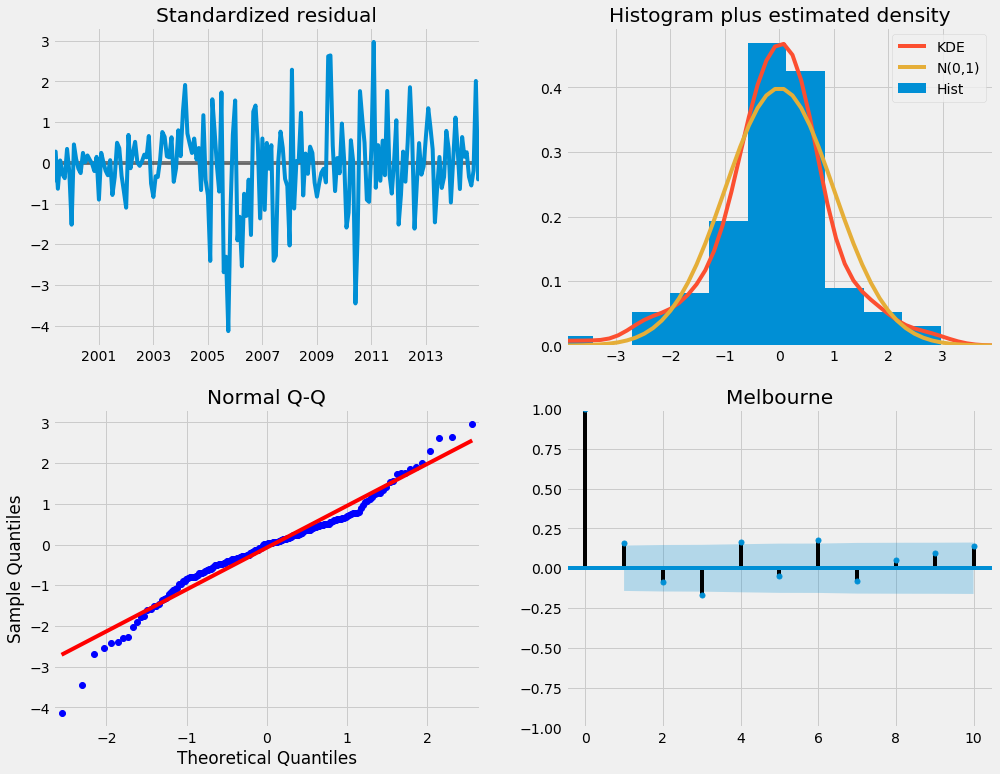

In [67]:
results.plot_diagnostics(figsize=(15, 12))
plt.title('Melbourne')
plt.show()



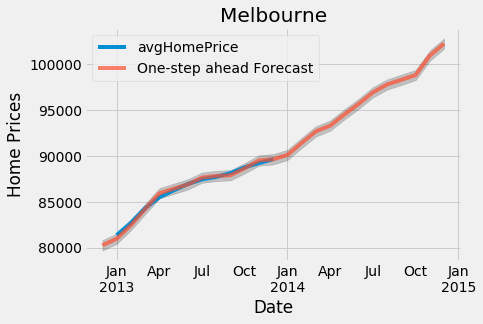

In [68]:
y = ts32935tr

pred = results.get_prediction(start=pd.to_datetime('2012-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2013-01-31':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Home Prices')
plt.legend()
plt.title('Melbourne')
plt.show()

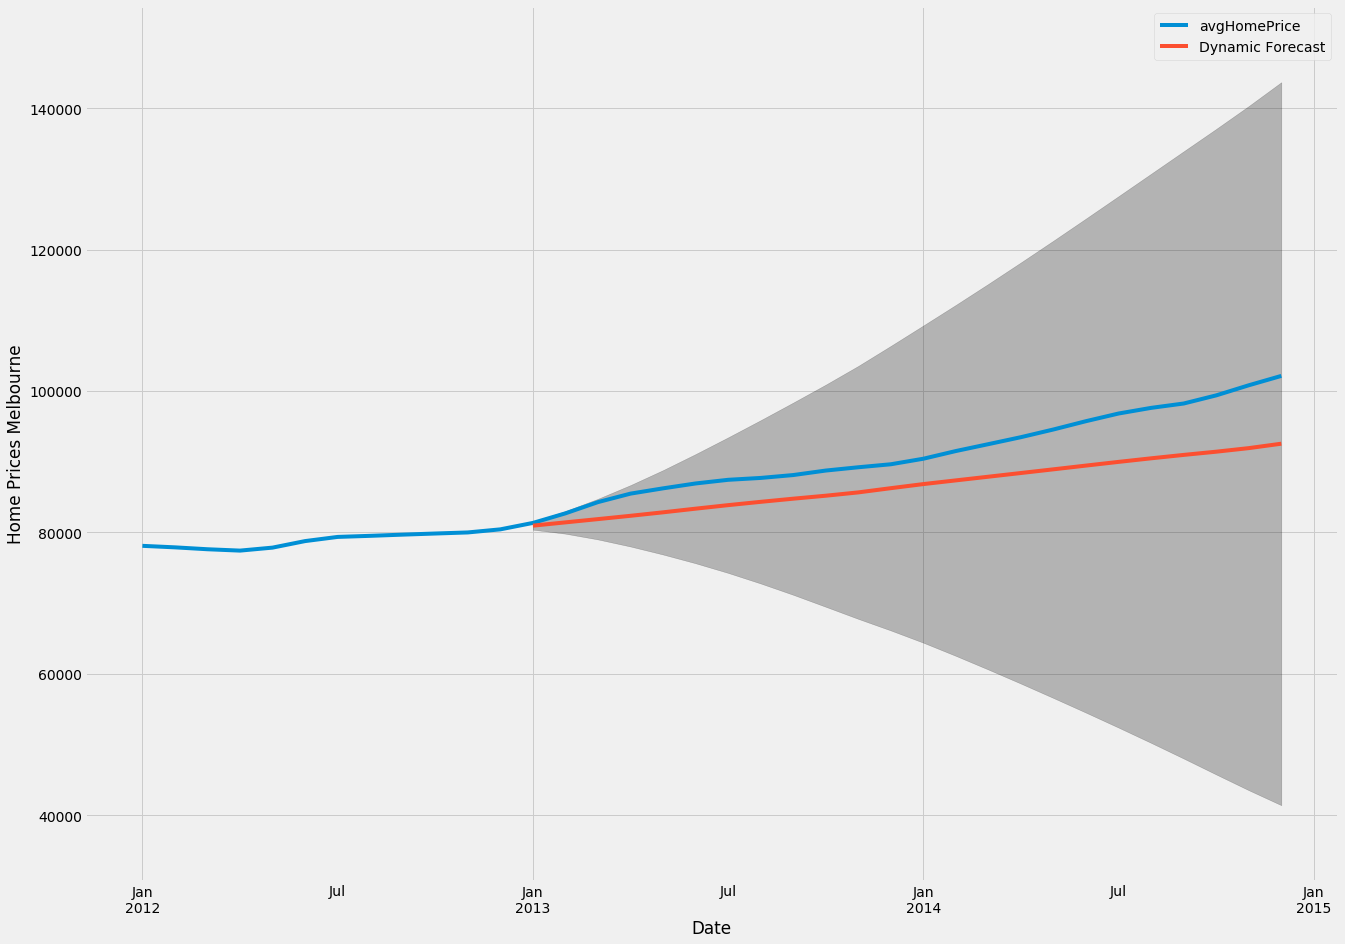

The Mean Squared Error of our forecasts is 2013-01-31 00:00:00   NaN
2013-02-28 00:00:00   NaN
2013-03-31 00:00:00   NaN
2013-04-30 00:00:00   NaN
2013-05-31 00:00:00   NaN
2013-06-30 00:00:00   NaN
2013-07-31 00:00:00   NaN
2013-08-31 00:00:00   NaN
2013-09-30 00:00:00   NaN
2013-10-31 00:00:00   NaN
2013-11-30 00:00:00   NaN
2013-12-31 00:00:00   NaN
2014-01-31 00:00:00   NaN
2014-02-28 00:00:00   NaN
2014-03-31 00:00:00   NaN
2014-04-30 00:00:00   NaN
2014-05-31 00:00:00   NaN
2014-06-30 00:00:00   NaN
2014-07-31 00:00:00   NaN
2014-08-31 00:00:00   NaN
2014-09-30 00:00:00   NaN
2014-10-31 00:00:00   NaN
2014-11-30 00:00:00   NaN
2014-12-31 00:00:00   NaN
avgHomePrice          NaN
dtype: float64


In [69]:
y = ts32935te

pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['2012-01-31':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Home Prices Melbourne')

plt.legend()
plt.show()


y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1997-01-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

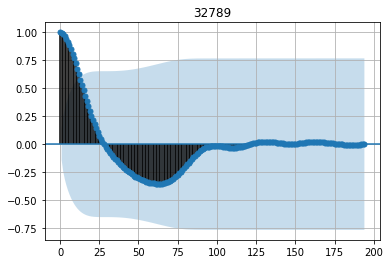

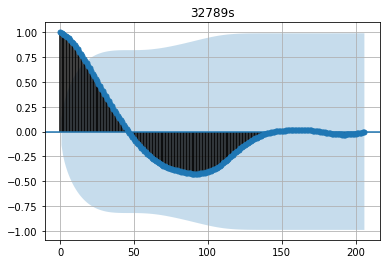

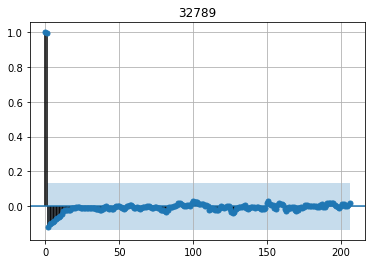

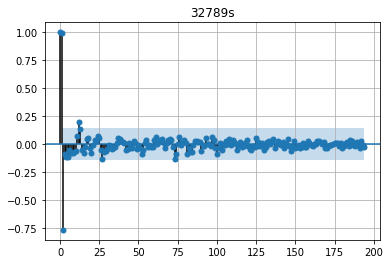

In [577]:
#ts32935 = tz
#ts32931 = tz
#ts32951 = tz
#ts32789
# create a differenced series

#differenced.to_csv('seasonally_adjusted.csv')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(ts32789s, ax=pyplot.gca())
plt.title('32789')
plt.grid(True)
pyplot.show()

plot_acf(ts32789, ax=pyplot.gca())
plt.title('32789s')
plt.grid(True)
pyplot.show()

#pyplot.subplot(212)

plot_pacf(ts32789, ax=pyplot.gca())
plt.title('32789')
plt.grid(True)
pyplot.show()

plot_pacf(ts32789s, ax=pyplot.gca())
plt.title('32789s')
plt.grid(True)
pyplot.show()



                             ARIMA Model Results                              
Dep. Variable:         D.avgHomePrice   No. Observations:                  215
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1806.480
Method:                       css-mle   S.D. of innovations           1072.507
Date:                Wed, 30 May 2018   AIC                           3618.961
Time:                        07:54:43   BIC                           3629.073
Sample:                    02-28-1997   HQIC                          3623.046
                         - 12-31-2014                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1158.9661   1422.191      0.815      0.416   -1628.478    3946.410
ar.L1.D.avgHomePrice     0.9527      0.019     49.822      0.000       0.915       0.990
            

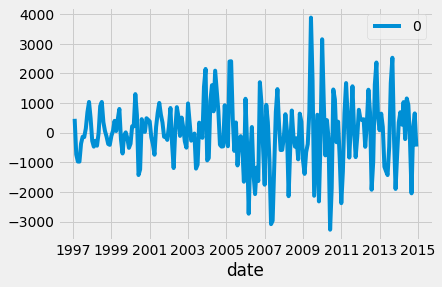

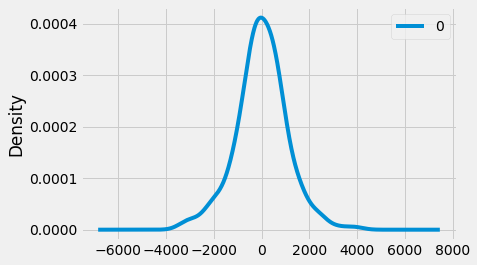

                 0
count   215.000000
mean     -2.447505
std    1075.444632
min   -3268.074449
25%    -511.030776
50%      -4.043680
75%     620.644365
max    3884.479601


In [49]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

#First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

model = ARIMA(ts32789te, order=(1,1,0))
model_fit = model.fit(disp=1)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())